In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
sns.set(color_codes=True)
import matplotlib.pyplot as plt
housing = pd.read_csv('room.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
housing.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [3]:
housing.shape

(545, 13)

In [4]:
housing.describe(include="all")

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
housing.isnull().sum()*100/housing.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

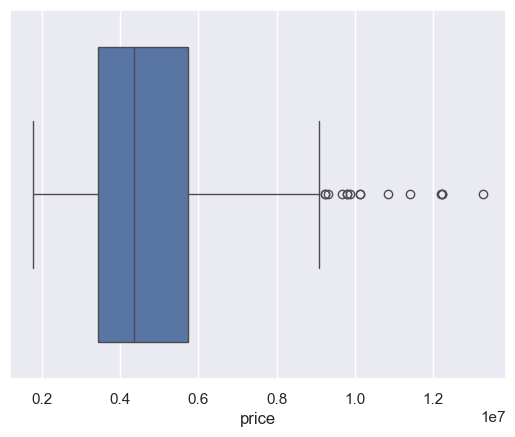

In [7]:
sns.boxplot(x="price", data=housing)
plt.show()

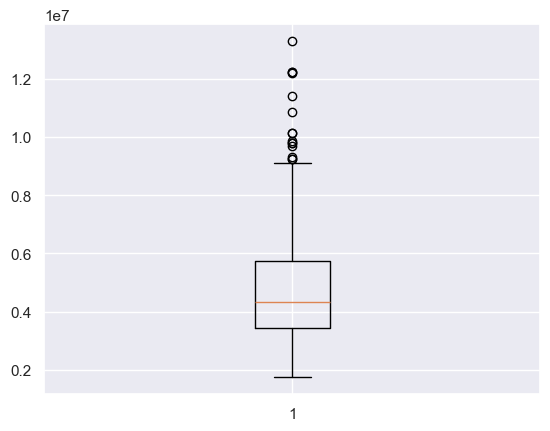

In [8]:
# since there are lot of outliers we need to remove them.
plt.boxplot(housing['price'])
q1 = housing['price'].quantile(0.25)
q3 = housing['price'].quantile(0.75)
iqr = q3 - q1
housing = housing[(housing['price'] >= q1 - 1.5* iqr) & (housing['price'] <= q3 + 1.5* iqr)]

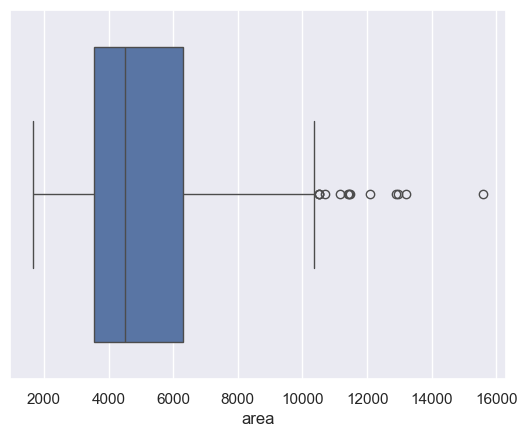

In [9]:
sns.boxplot(x="area", data=housing)
plt.show()

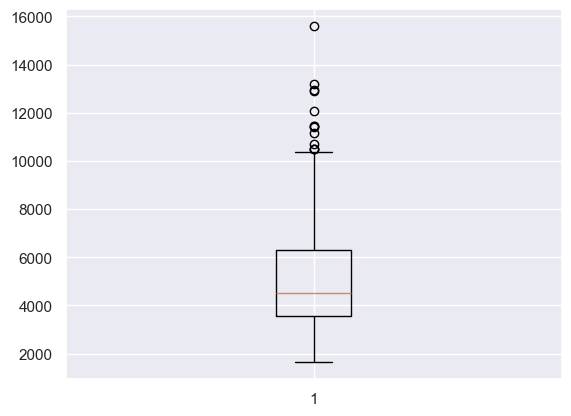

In [10]:
#due to outliers
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

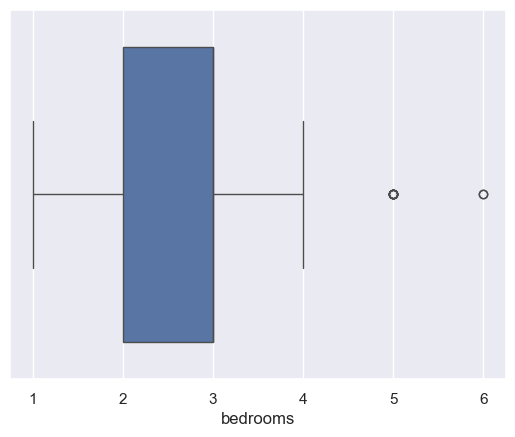

In [11]:
sns.boxplot(x="bedrooms", data=housing)
plt.show()

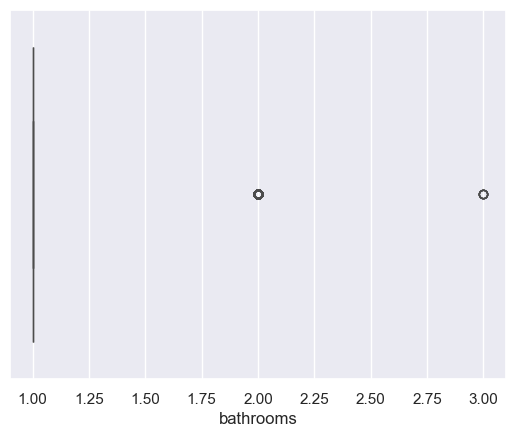

In [12]:
sns.boxplot(x="bathrooms", data=housing)
plt.show()

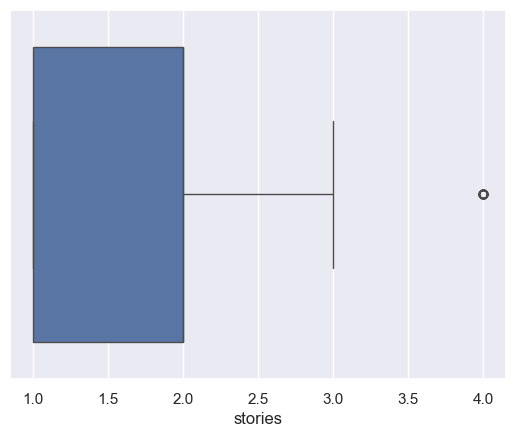

In [13]:
sns.boxplot(x="stories", data=housing)
plt.show()

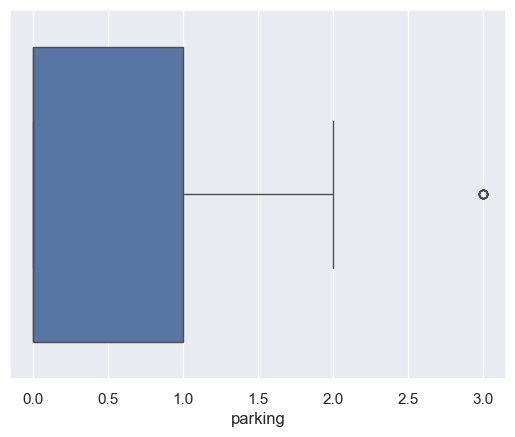

In [14]:
sns.boxplot(x="parking", data=housing)
plt.show()

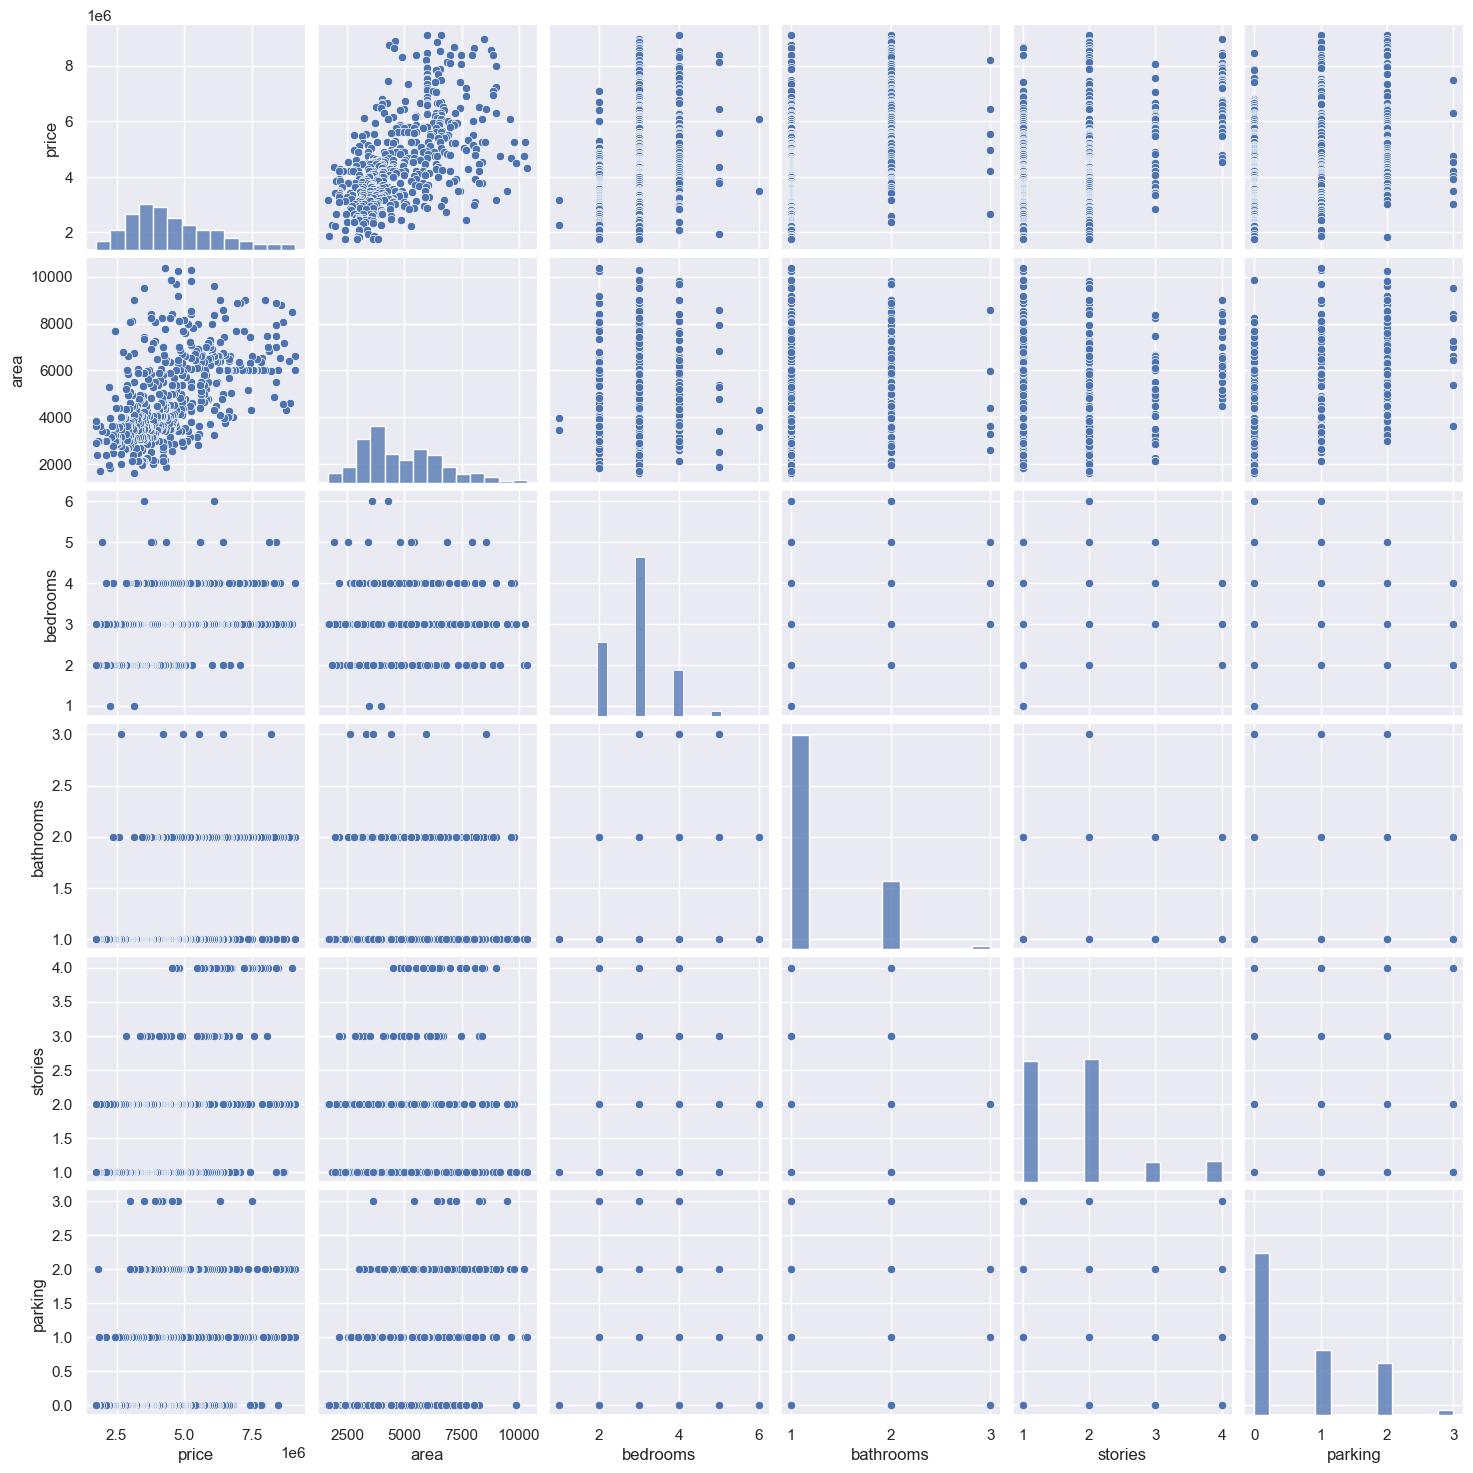

In [15]:
sns.pairplot(housing)
plt.show()

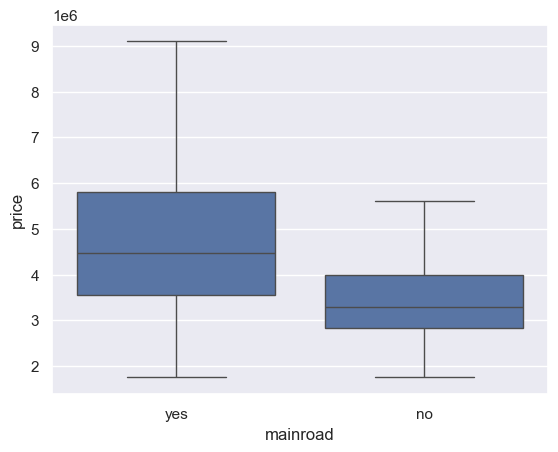

In [16]:
# for categorical features
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.show()

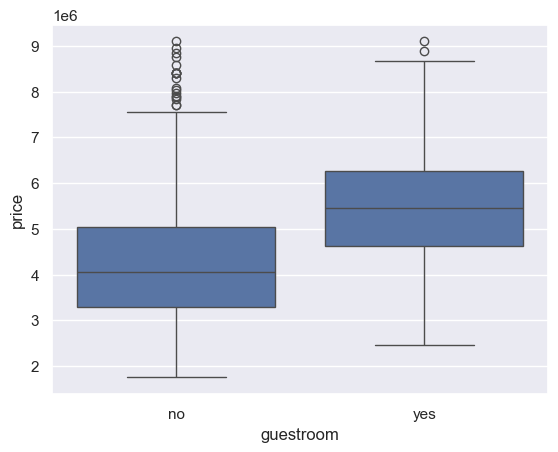

In [17]:
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.show()

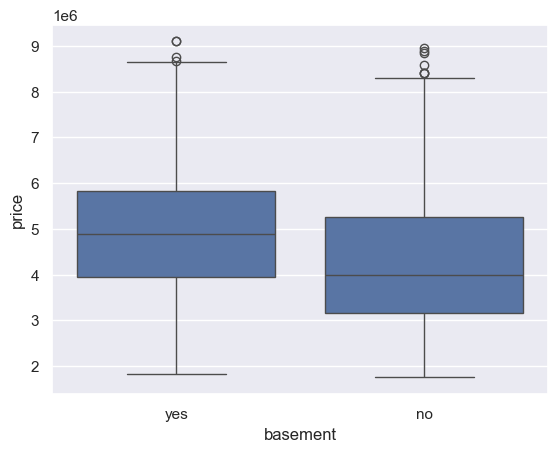

In [18]:
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.show()

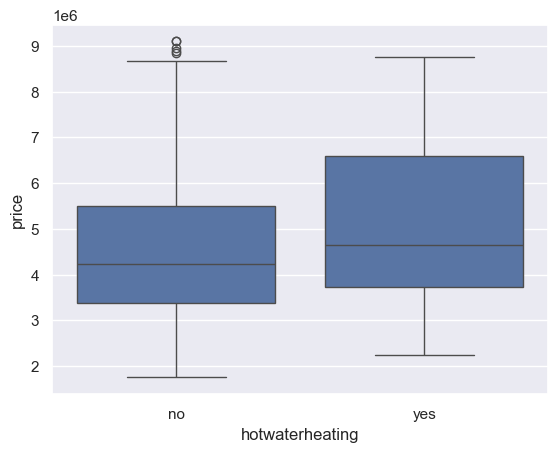

In [19]:
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.show()

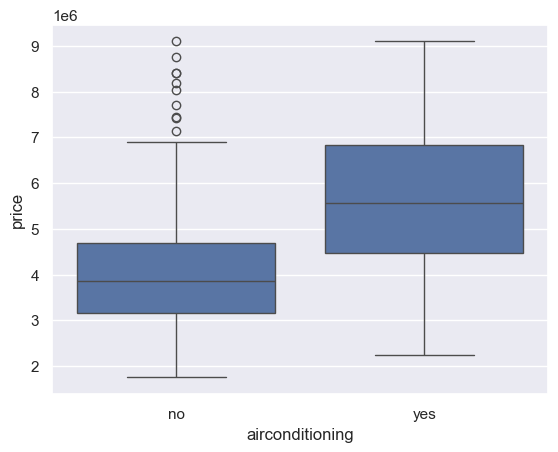

In [20]:
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.show()

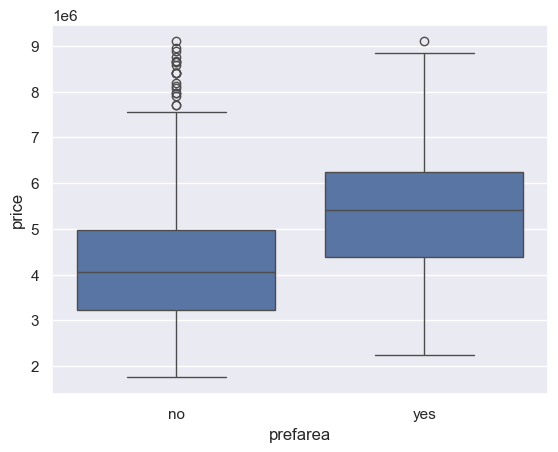

In [21]:
sns.boxplot(x = 'prefarea', y = 'price', data = housing)
plt.show()

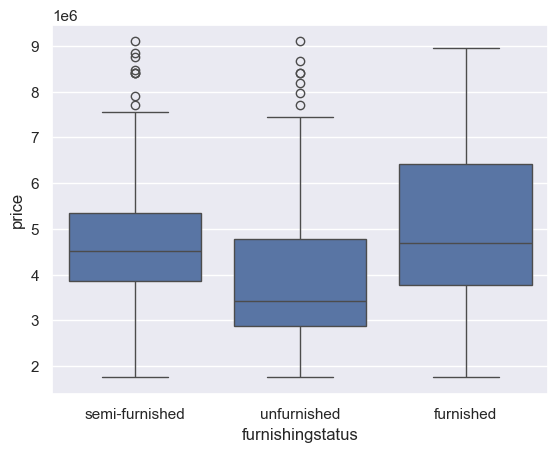

In [22]:
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

In [23]:
# finding values of categorical variables
print(housing['mainroad'].unique())
print(housing['guestroom'].unique())
print(housing['basement'].unique())
print(housing['hotwaterheating'].unique())
print(housing['airconditioning'].unique())
print(housing['prefarea'].unique())
print(housing['furnishingstatus'].unique())

['yes' 'no']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['semi-furnished' 'unfurnished' 'furnished']


In [24]:
#for converting categorical values into numeric values
categorical_list =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

housing[categorical_list] = housing[categorical_list].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [25]:
#for furnishing status
mapping = {'unfurnished': 0,'semi-furnished': 1,'furnished': 2}
housing['furnishingstatus'] = housing['furnishingstatus'].map(mapping)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,2
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,2
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X = housing.drop('price', axis=1)
y = housing['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
y_pred

array([6338978.8       , 4327015.        , 4036200.        ,
       5048400.        , 4828355.        , 6468204.4       ,
       4074105.        , 3483270.        , 3808490.        ,
       3517570.        , 2932930.        , 3578260.        ,
       5665695.        , 6169584.4       , 7758433.2       ,
       3486700.        , 6186950.        , 5944680.        ,
       4998070.        , 5627300.        , 5664260.        ,
       3932498.5       , 4578070.        , 5326370.        ,
       5904990.        , 4808370.        , 5742310.        ,
       2874480.        , 3501400.        , 3525480.        ,
       3284578.5       , 3331167.        , 6477800.        ,
       7196533.4       , 7095410.        , 3338240.5       ,
       2575230.        , 5119800.        , 7273281.4       ,
       3835055.        , 4164650.        , 5971735.        ,
       3971450.        , 6503070.        , 3557785.        ,
       4540935.        , 5733525.        , 3215613.33333333,
       3696000.        ,

In [27]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score (R²): {r2}")

Mean Squared Error (MSE): 1079832034713.5913
R-squared Score (R²): 0.6319363827901321


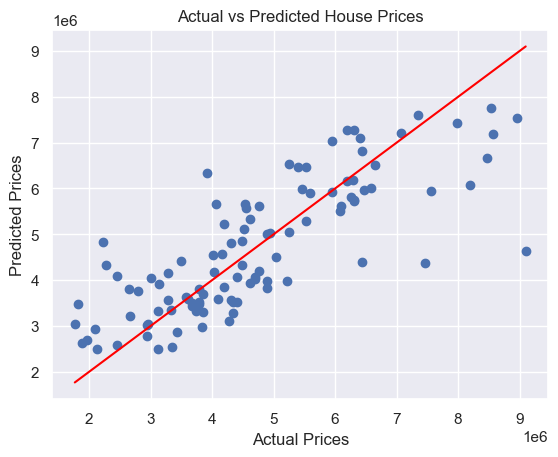

In [28]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()